## Import Packages ##

In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display
pd.set_option('display.max_columns', 500)

## Import Data ##

In [3]:
cases = pd.read_csv("./data/wwc_case_scm_sold_price_volume.csv",index_col=False)
prices = pd.read_csv("./data/wwc_cosmetics_scm_median_sold_price.csv",index_col=False)
volume = pd.read_csv("./data/wwc_cosmetics_scm_sold_volume.csv",index_col=False)

In [324]:
display(cases.head(8))
display(prices.head())
display(volume.head())

,Update Date,Actual Date,Price (Median),Volume (Sold)
0,Day 0,9/30/2020,1.31,15080
1,Day 1,10/1/2020,0.71,52741
2,Day 2,10/2/2020,0.47,41344
3,Day 3,10/3/2020,0.38,33506
4,Day 4,10/4/2020,0.21,29132
5,Day 5,10/5/2020,0.11,23698
6,Day 6,10/6/2020,0.09,15851
7,Day 7,10/7/2020,0.07,16090


,Cosmetic Name,Grade,Unboxing Odds,Quality,multiclass_indicator,misc_indicator,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
0,All Hallows' Hatte,Elite,0.005,Unique,1,0,17.08,13.70,14.47,12.57,11.05,9.94,9.21,9.16
1,Balloonicorpse,Elite,0.005,Unique,1,1,10.57,5.16,4.14,3.50,4.40,3.78,3.58,3.48
2,Wrap-A-Khamon,Assassin,0.010,Unique,1,0,4.60,1.58,1.28,1.16,0.96,0.85,0.84,0.82
3,Misfortune Fedora,Assassin,0.010,Unique,1,0,3.60,1.36,1.19,1.01,0.89,0.83,0.80,0.73
4,Wavefinder,Assassin,0.010,Unique,0,0,3.27,1.64,1.29,1.26,1.09,0.96,0.91,0.87


,Cosmetic Name,Grade,Unboxing Odds,Quality,multiclass_indicator,misc_indicator,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
0,All Hallows' Hatte,Elite,0.005,Unique,1,0,12,92,66,48,42,41,32,37
1,Balloonicorpse,Elite,0.005,Unique,1,1,13,87,58,50,20,21,29,27
2,Wrap-A-Khamon,Assassin,0.010,Unique,1,0,22,153,115,67,86,63,61,55
3,Misfortune Fedora,Assassin,0.010,Unique,1,0,25,176,118,91,82,70,79,46
4,Wavefinder,Assassin,0.010,Unique,0,0,30,133,112,98,62,65,55,51


### Recoup Rate: % of Unboxing Costs (purchasing keys + cases) Recouped from Selling Unboxed Unique or Strange Items on the same day / Unboxing Costs ###

In [325]:
temp = prices[['Cosmetic Name','Grade','Unboxing Odds','Quality','Day 0','Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7']]
temp.loc[temp['Quality'] == 'Strange', 'Quality Odds'] = 0.1
temp.loc[temp['Quality'] == 'Unique', 'Quality Odds'] = 0.9 
temp['Unboxing Odds with Quality'] = temp['Unboxing Odds'] * temp['Quality Odds']
n_cases = 100
temp['Expected Count Unbox with 100 Cases based on Unboxing Odds with Quality'] = temp['Unboxing Odds with Quality'] * n_cases
temp['Expected Recoup Amount from Selling Unique and Strange on Day 0'] = temp['Expected Count Unbox with 100 Cases based on Unboxing Odds with Quality'] * temp['Day 0']
temp['Expected Recoup Amount from Selling Unique and Strange on Day 1'] = temp['Expected Count Unbox with 100 Cases based on Unboxing Odds with Quality'] * temp['Day 1']
temp['Expected Recoup Amount from Selling Unique and Strange on Day 2'] = temp['Expected Count Unbox with 100 Cases based on Unboxing Odds with Quality'] * temp['Day 2']
temp['Expected Recoup Amount from Selling Unique and Strange on Day 3'] = temp['Expected Count Unbox with 100 Cases based on Unboxing Odds with Quality'] * temp['Day 3']
temp['Expected Recoup Amount from Selling Unique and Strange on Day 4'] = temp['Expected Count Unbox with 100 Cases based on Unboxing Odds with Quality'] * temp['Day 4']
temp['Expected Recoup Amount from Selling Unique and Strange on Day 5'] = temp['Expected Count Unbox with 100 Cases based on Unboxing Odds with Quality'] * temp['Day 5']
temp['Expected Recoup Amount from Selling Unique and Strange on Day 6'] = temp['Expected Count Unbox with 100 Cases based on Unboxing Odds with Quality'] * temp['Day 6']
temp['Expected Recoup Amount from Selling Unique and Strange on Day 7'] = temp['Expected Count Unbox with 100 Cases based on Unboxing Odds with Quality'] * temp['Day 7']
temp = temp.iloc[:,15:]
temp = temp.fillna(0)
temp


,Expected Recoup Amount from Selling Unique and Strange on Day 0,Expected Recoup Amount from Selling Unique and Strange on Day 1,Expected Recoup Amount from Selling Unique and Strange on Day 2,Expected Recoup Amount from Selling Unique and Strange on Day 3,Expected Recoup Amount from Selling Unique and Strange on Day 4,Expected Recoup Amount from Selling Unique and Strange on Day 5,Expected Recoup Amount from Selling Unique and Strange on Day 6,Expected Recoup Amount from Selling Unique and Strange on Day 7
0,7.6860,6.1650,6.5115,5.6565,4.9725,4.4730,4.1445,4.1220
1,4.7565,2.3220,1.8630,1.5750,1.9800,1.7010,1.6110,1.5660
2,4.1400,1.4220,1.1520,1.0440,0.8640,0.7650,0.7560,0.7380
3,3.2400,1.2240,1.0710,0.9090,0.8010,0.7470,0.7200,0.6570
4,2.9430,1.4760,1.1610,1.1340,0.9810,0.8640,0.8190,0.7830
5,4.4820,4.2210,4.2750,3.9330,3.3210,2.6640,2.5920,2.6640
6,2.4075,1.1250,0.7200,0.5175,0.4500,0.4275,0.4050,0.3825
7,4.4325,4.3200,4.0950,3.1275,2.6775,2.3175,2.3625,2.2950
8,3.3525,0.9225,0.6975,0.6300,0.4500,0.4500,0.4500,0.4275
9,1.9125,0.7875,0.5625,0.4500,0.3825,0.3600,0.3600,0.3375


In [326]:
round(temp.sum(),2).to_dict()

{'Expected Recoup Amount from Selling Unique and Strange on Day 0': 123.24,
 'Expected Recoup Amount from Selling Unique and Strange on Day 1': 79.23,
 'Expected Recoup Amount from Selling Unique and Strange on Day 2': 68.37,
 'Expected Recoup Amount from Selling Unique and Strange on Day 3': 58.13,
 'Expected Recoup Amount from Selling Unique and Strange on Day 4': 52.8,
 'Expected Recoup Amount from Selling Unique and Strange on Day 5': 48.27,
 'Expected Recoup Amount from Selling Unique and Strange on Day 6': 47.06,
 'Expected Recoup Amount from Selling Unique and Strange on Day 7': 45.79}

In [327]:
temp_dic = {}
temp_dic['Day 0 Cost Of Unboxing'] = ((cases[cases['Update Date'] == 'Day 0']['Price (Median)'] * n_cases) + (2.5 * n_cases)).values[0]
temp_dic['Day 1 Cost Of Unboxing'] = ((cases[cases['Update Date'] == 'Day 1']['Price (Median)'] * n_cases) + (2.5 * n_cases)).values[0]
temp_dic['Day 2 Cost Of Unboxing'] = ((cases[cases['Update Date'] == 'Day 2']['Price (Median)'] * n_cases) + (2.5 * n_cases)).values[0]
temp_dic['Day 3 Cost Of Unboxing'] = ((cases[cases['Update Date'] == 'Day 3']['Price (Median)'] * n_cases) + (2.5 * n_cases)).values[0]
temp_dic['Day 4 Cost Of Unboxing'] = ((cases[cases['Update Date'] == 'Day 4']['Price (Median)'] * n_cases) + (2.5 * n_cases)).values[0]
temp_dic['Day 5 Cost Of Unboxing'] = ((cases[cases['Update Date'] == 'Day 5']['Price (Median)'] * n_cases) + (2.5 * n_cases)).values[0]
temp_dic['Day 6 Cost Of Unboxing'] = ((cases[cases['Update Date'] == 'Day 6']['Price (Median)'] * n_cases) + (2.5 * n_cases)).values[0]
temp_dic['Day 7 Cost Of Unboxing'] = ((cases[cases['Update Date'] == 'Day 7']['Price (Median)'] * n_cases) + (2.5 * n_cases)).values[0]
temp_dic

{'Day 0 Cost Of Unboxing': 381.0,
 'Day 1 Cost Of Unboxing': 321.0,
 'Day 2 Cost Of Unboxing': 297.0,
 'Day 3 Cost Of Unboxing': 288.0,
 'Day 4 Cost Of Unboxing': 271.0,
 'Day 5 Cost Of Unboxing': 261.0,
 'Day 6 Cost Of Unboxing': 259.0,
 'Day 7 Cost Of Unboxing': 257.0}

In [328]:
recoupable = list(round(temp.sum(),2).to_dict().values())
recoupable

[123.24, 79.23, 68.37, 58.13, 52.8, 48.27, 47.06, 45.79]

In [329]:
cost = list(temp_dic.values())
cost

[381.0, 321.0, 297.0, 288.0, 271.0, 261.0, 259.0, 257.0]

In [330]:
roi_values = [round(i / j * 100.0,1) for i, j in zip(recoupable, cost)]
roi_values

[32.3, 24.7, 23.0, 20.2, 19.5, 18.5, 18.2, 17.8]

In [331]:
roi_keys = ['Day 0','Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7']
roi_keys

['Day 0', 'Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']

In [332]:
roi_dic = {k:v for (k,v) in zip(roi_keys,roi_values)}
roi_dic

{'Day 0': 32.3,
 'Day 1': 24.7,
 'Day 2': 23.0,
 'Day 3': 20.2,
 'Day 4': 19.5,
 'Day 5': 18.5,
 'Day 6': 18.2,
 'Day 7': 17.8}

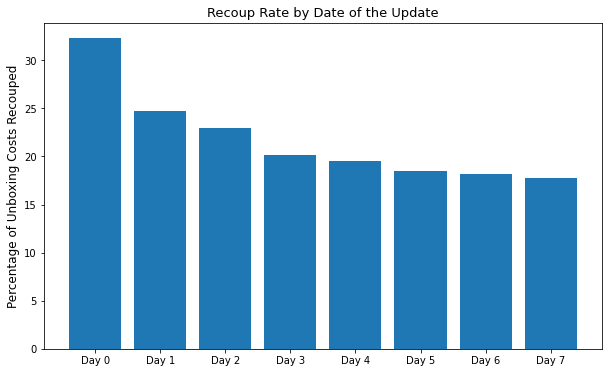

In [334]:
plt.figure(figsize=(10,6))
plt.bar(*zip(*roi_dic.items()))
plt.title('Recoup Rate by Date of the Update',fontsize = 13)
plt.ylabel('Percentage of Unboxing Costs Recouped',fontsize=12)
plt.show()

## Volume Analysis ##

In [13]:
volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cosmetic Name         44 non-null     object 
 1   Grade                 44 non-null     object 
 2   Unboxing Odds         44 non-null     float64
 3   Quality               44 non-null     object 
 4   multiclass_indicator  44 non-null     int64  
 5   misc_indicator        44 non-null     int64  
 6   Day 0                 44 non-null     int64  
 7   Day 1                 44 non-null     int64  
 8   Day 2                 44 non-null     int64  
 9   Day 3                 44 non-null     int64  
 10  Day 4                 44 non-null     int64  
 11  Day 5                 44 non-null     int64  
 12  Day 6                 44 non-null     int64  
 13  Day 7                 44 non-null     int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 4.4+ KB


In [14]:
volume['Quantity_Sold'] = volume['Day 0'] + volume['Day 1'] + volume['Day 2'] + volume['Day 3'] + volume['Day 4'] + volume['Day 5'] + volume['Day 6'] + volume['Day 7']

In [57]:
volume['Quality_and_Grade'] = volume['Quality'] + "&" + volume['Grade']

In [58]:
volume['Quality_and_Grade'].value_counts()

Unique&Mercenary     10
Strange&Mercenary    10
Unique&Commando       6
Strange&Commando      6
Unique&Assassin       4
Strange&Assassin      4
Strange&Elite         2
Unique&Elite          2
Name: Quality_and_Grade, dtype: int64

In [59]:
volume.head()

,Cosmetic Name,Grade,Unboxing Odds,Quality,multiclass_indicator,misc_indicator,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Quantity_Sold,Quality_and_Grade
0,All Hallows' Hatte,Elite,0.005,Unique,1,0,12,92,66,48,42,41,32,37,370,Unique&Elite
1,Balloonicorpse,Elite,0.005,Unique,1,1,13,87,58,50,20,21,29,27,305,Unique&Elite
2,Wrap-A-Khamon,Assassin,0.010,Unique,1,0,22,153,115,67,86,63,61,55,622,Unique&Assassin
3,Misfortune Fedora,Assassin,0.010,Unique,1,0,25,176,118,91,82,70,79,46,687,Unique&Assassin
4,Wavefinder,Assassin,0.010,Unique,0,0,30,133,112,98,62,65,55,51,606,Unique&Assassin


In [84]:
print('total quantity sold')
display(round(volume.groupby(['Quality','Grade']).agg({'Quantity_Sold':sum}),0).sort_index())

total quantity sold


Quantity_Sold
Quality Grade                   
Strange Assassin             362
        Commando            1405
        Elite                 90
        Mercenary           5677
Unique  Assassin            2745
        Commando           10415
        Elite                675
        Mercenary          43882

In [118]:
df_agg = volume.groupby(['Grade','Cosmetic Name']).agg({'Quantity_Sold':sum})
df_agg

Quantity_Sold
Grade     Cosmetic Name                         
Assassin  Misfortune Fedora                  790
          The Fire Tooth                     936
          Wavefinder                         685
          Wrap-A-Khamon                      696
Commando  Eye-See-You                       2565
          Glow from Below                   1609
          Gourd Grin                        2636
          Impish Ears                       1606
          Semi-tame Trapper's Hat           1592
          Sir Pumpkinton                    1812
Elite     All Hallows' Hatte                 412
          Balloonicorpse                     353
Mercenary A Handsome Handy Thing            4340
          Calamitous Cauldron               4283
          Flavorful Baggies                 4457
          Goblineer                         4780
          Handsome Devil                    6694
          Hollowed Helm                     4572
          King Cardbeard                    4473
          The Boom Boxers                   4586
          The Ghoul Box                     4464
          The Seared Sorcerer               6910

In [120]:
print('top selling item in each grade')
df_agg = volume.groupby(['Grade','Cosmetic Name']).agg({'Quantity_Sold':sum})
g = df_agg['Quantity_Sold'].groupby('Grade', group_keys=False)
pd.DataFrame(g.nlargest(1))

top selling item in each grade


,,Quantity_Sold
Grade,Cosmetic Name,
Assassin,The Fire Tooth,936
Commando,Gourd Grin,2636
Elite,All Hallows' Hatte,412
Mercenary,The Seared Sorcerer,6910


In [121]:
print('worst selling item in each grade')
df_agg = volume.groupby(['Grade','Cosmetic Name']).agg({'Quantity_Sold':sum})
g = df_agg['Quantity_Sold'].groupby('Grade', group_keys=False)
pd.DataFrame(g.nsmallest(1))

worst selling item in each grade


,,Quantity_Sold
Grade,Cosmetic Name,
Assassin,Wavefinder,685
Commando,Semi-tame Trapper's Hat,1592
Elite,Balloonicorpse,353
Mercenary,Calamitous Cauldron,4283


In [108]:
len(volume.groupby(['Quality','Grade','Cosmetic Name']).agg({'Quantity_Sold':sum}))

44

In [376]:
#Overall
dic={}
for col in volume.iloc[:, 6:13].columns:
    daily_sold_quantity = volume.iloc[:, 6:13][col].sum()
    dic[col] = daily_sold_quantity
dic    

{'Day 0': 2603,
 'Day 1': 13475,
 'Day 2': 12306,
 'Day 3': 10387,
 'Day 4': 8304,
 'Day 5': 7031,
 'Day 6': 5825}

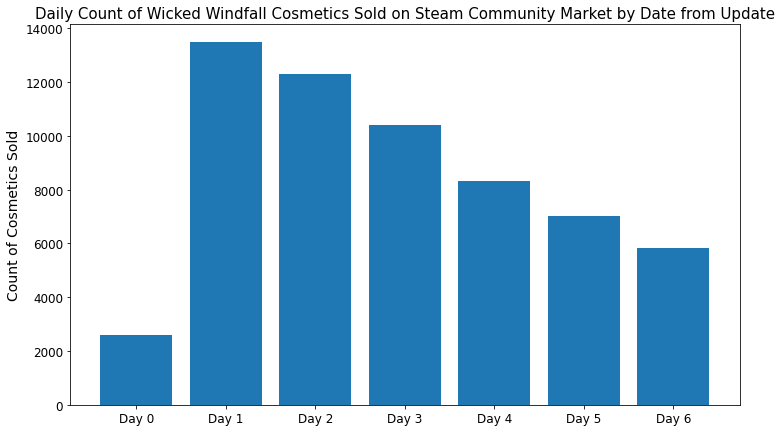

In [384]:
plt.figure(figsize=(12,7))
plt.bar(*zip(*dic.items()))
plt.title('Daily Count of Wicked Windfall Cosmetics Sold on Steam Community Market by Date from Update',fontsize=15)
plt.ylabel('Count of Cosmetics Sold',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig('daily_sold_volume.png')
plt.show()

In [ ]:
plt.figure(figsize=(12,7))
plt.bar(cases.head(8)['Update Date'], cases.head(8)['Price (Median)'])
xlocs, xlabs = plt.xticks()
for i, v in enumerate(ccd):
    plt.text(xlocs[i] - 0.3, v - 0.06, "$" + str(v),fontsize=14,c='w')
plt.title('Daily Price of Wicked Windfall Case from the Start of the Update (Day 0: the date of the Update on 09/30/2020)',fontsize=15)
plt.ylabel('Daily Case Price',fontsize=14)
#plt.xlabel('Day Since Update',fontsize=14)
plt.xticks(fontsize=11)
plt.savefig('daily_price_wwc.png')
plt.show()

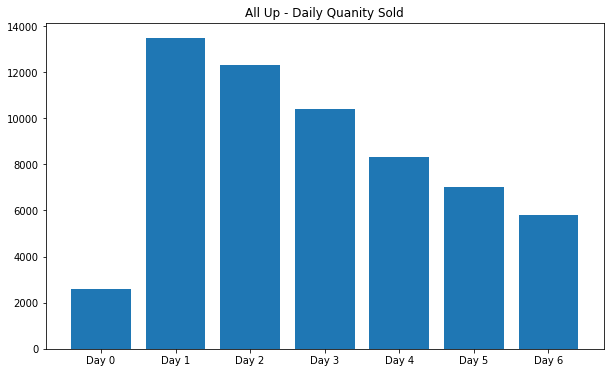

In [377]:
plt.figure(figsize=(10,6))
plt.bar(*zip(*dic.items()))
plt.title('All Up - Daily Quanity Sold')
plt.show()

In [63]:
d = collections.defaultdict(dict)

for qg in volume.Quality_and_Grade.unique():
    for col in volume.iloc[:, 6:13].columns:
        daily_sold_quantity = volume[volume['Quality_and_Grade'] == qg][col].sum()
        d[qg][col] = daily_sold_quantity
d

defaultdict(dict,
            {'Unique&Elite': {'Day 0': 25,
              'Day 1': 179,
              'Day 2': 124,
              'Day 3': 98,
              'Day 4': 62,
              'Day 5': 62,
              'Day 6': 61},
             'Unique&Assassin': {'Day 0': 130,
              'Day 1': 665,
              'Day 2': 501,
              'Day 3': 367,
              'Day 4': 327,
              'Day 5': 284,
              'Day 6': 257},
             'Unique&Commando': {'Day 0': 440,
              'Day 1': 2236,
              'Day 2': 1817,
              'Day 3': 1647,
              'Day 4': 1320,
              'Day 5': 1168,
              'Day 6': 914},
             'Unique&Mercenary': {'Day 0': 1739,
              'Day 1': 8728,
              'Day 2': 8534,
              'Day 3': 7114,
              'Day 4': 5717,
              'Day 5': 4627,
              'Day 6': 3926},
             'Strange&Elite': {'Day 0': 1,
              'Day 1': 14,
              'Day 2': 23,
              'D

In [70]:
len(d)

8

In [72]:
d.keys()

dict_keys(['Unique&Elite', 'Unique&Assassin', 'Unique&Commando', 'Unique&Mercenary', 'Strange&Elite', 'Strange&Assassin', 'Strange&Commando', 'Strange&Mercenary'])

In [75]:
d['Unique&Elite']

{'Day 0': 25,
 'Day 1': 179,
 'Day 2': 124,
 'Day 3': 98,
 'Day 4': 62,
 'Day 5': 62,
 'Day 6': 61}

In [76]:
d['Unique&Elite']['Day 0']

25

In [ ]:
# fig, ax = plt.subplots(nrows=4, ncols=2)

# for row in ax:
#     for col in row:
#         col.plot(x, y)

# plt.show()

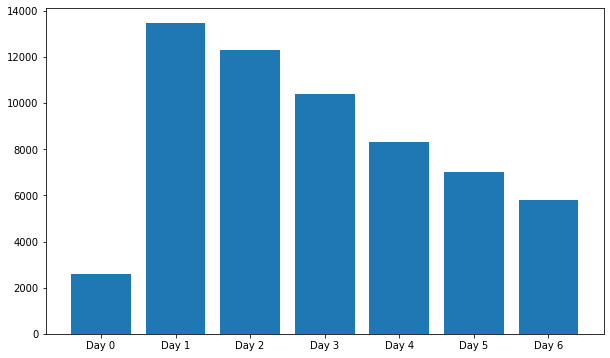

In [36]:
plt.figure(figsize=(10,6))
plt.bar(*zip(*dic.items()))
plt.show()

## Cases ##

In [21]:
cases.head(2)

,Update Date,Actual Date,Price (Median),Volume (Sold)
0,Day 0,9/30/2020,1.31,15080
1,Day 1,10/1/2020,0.71,52741


In [22]:
cases.head(8)['Price (Median)']

0    1.31
1    0.71
2    0.47
3    0.38
4    0.21
5    0.11
6    0.09
7    0.07
Name: Price (Median), dtype: float64

In [23]:
cases.head(8)['Price (Median)']

0    1.31
1    0.71
2    0.47
3    0.38
4    0.21
5    0.11
6    0.09
7    0.07
Name: Price (Median), dtype: float64

In [24]:
toibels = ["label%d" % i for i in range(5)]
toibels

['label0', 'label1', 'label2', 'label3', 'label4']

In [25]:
ccd = list(cases.head(8)['Price (Median)'])
cce = [ '$'+ str(i) for i in ccd]
cce

['$1.31', '$0.71', '$0.47', '$0.38', '$0.21', '$0.11', '$0.09', '$0.07']

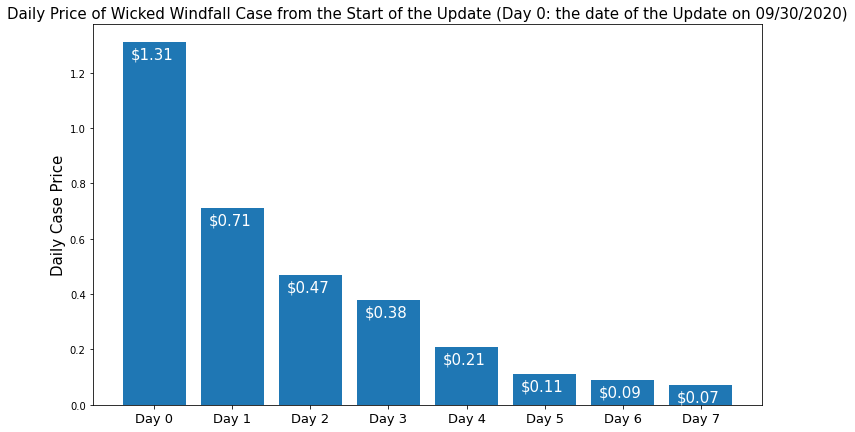

In [26]:
plt.figure(figsize=(12,7))
plt.bar(cases.head(8)['Update Date'], cases.head(8)['Price (Median)'])
xlocs, xlabs = plt.xticks()
for i, v in enumerate(ccd):
    plt.text(xlocs[i] - 0.3, v - 0.06, "$" + str(v),fontsize=15,c='w')
plt.title('Daily Price of Wicked Windfall Case from the Start of the Update (Day 0: the date of the Update on 09/30/2020)',fontsize=15)
plt.ylabel('Daily Case Price',fontsize=15)
#plt.xlabel('Day Since Update',fontsize=14)
plt.xticks(fontsize=13)
plt.savefig('daily_price_wwc.png',dpi=200)
plt.show()

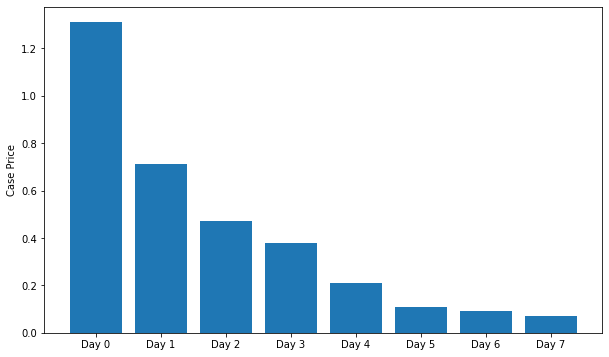

In [335]:
plt.figure(figsize=(10,6))
plt.bar(cases.head(8)['Update Date'], cases.head(8)['Price (Median)'])
plt.ylabel('Case Price')
plt.show()

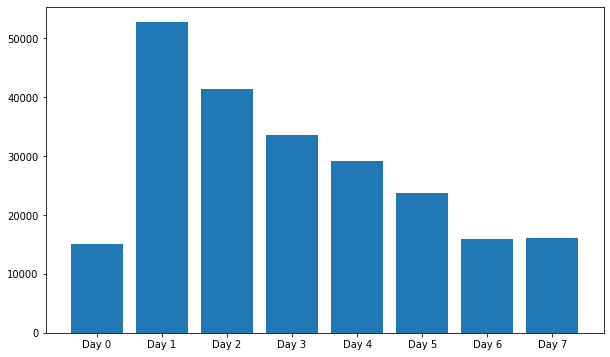

In [40]:
plt.figure(figsize=(10,6))
plt.bar(cases.head(8)['Update Date'], cases.head(8)['Volume (Sold)'])
plt.show()

## Price Analysis ##

In [132]:
c = (9.16/13.7)-1
c

-0.3313868613138685

In [133]:
(1+c)*13.7

9.16

In [122]:
prices

,Cosmetic Name,Grade,Unboxing Odds,Quality,multiclass_indicator,misc_indicator,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
0,All Hallows' Hatte,Elite,0.005,Unique,1,0,17.08,13.70,14.47,12.57,11.05,9.94,9.21,9.16
1,Balloonicorpse,Elite,0.005,Unique,1,1,10.57,5.16,4.14,3.50,4.40,3.78,3.58,3.48
2,Wrap-A-Khamon,Assassin,0.010,Unique,1,0,4.60,1.58,1.28,1.16,0.96,0.85,0.84,0.82
3,Misfortune Fedora,Assassin,0.010,Unique,1,0,3.60,1.36,1.19,1.01,0.89,0.83,0.80,0.73
4,Wavefinder,Assassin,0.010,Unique,0,0,3.27,1.64,1.29,1.26,1.09,0.96,0.91,0.87
5,The Fire Tooth,Assassin,0.010,Unique,0,1,4.98,4.69,4.75,4.37,3.69,2.96,2.88,2.96
6,Semi-tame Trapper's Hat,Commando,0.025,Unique,0,0,1.07,0.50,0.32,0.23,0.20,0.19,0.18,0.17
7,Gourd Grin,Commando,0.025,Unique,1,1,1.97,1.92,1.82,1.39,1.19,1.03,1.05,1.02
8,Sir Pumpkinton,Commando,0.025,Unique,1,0,1.49,0.41,0.31,0.28,0.20,0.20,0.20,0.19
9,Impish Ears,Commando,0.025,Unique,1,1,0.85,0.35,0.25,0.20,0.17,0.16,0.16,0.15


In [130]:
prices['Pct_change_from_day1_to_day7'] = (prices['Day 7'] / prices['Day 1']) - 1

In [131]:
prices.head()

,Cosmetic Name,Grade,Unboxing Odds,Quality,multiclass_indicator,misc_indicator,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Pct_change_from_day1_to_day7
0,All Hallows' Hatte,Elite,0.005,Unique,1,0,17.08,13.70,14.47,12.57,11.05,9.94,9.21,9.16,-0.331387
1,Balloonicorpse,Elite,0.005,Unique,1,1,10.57,5.16,4.14,3.50,4.40,3.78,3.58,3.48,-0.325581
2,Wrap-A-Khamon,Assassin,0.010,Unique,1,0,4.60,1.58,1.28,1.16,0.96,0.85,0.84,0.82,-0.481013
3,Misfortune Fedora,Assassin,0.010,Unique,1,0,3.60,1.36,1.19,1.01,0.89,0.83,0.80,0.73,-0.463235
4,Wavefinder,Assassin,0.010,Unique,0,0,3.27,1.64,1.29,1.26,1.09,0.96,0.91,0.87,-0.469512


In [143]:
prices[prices['Cosmetic Name'] == 'Wavefinder']

,Cosmetic Name,Grade,Unboxing Odds,Quality,multiclass_indicator,misc_indicator,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Pct_change_from_day1_to_day7
4,Wavefinder,Assassin,0.01,Unique,0,0,3.27,1.64,1.29,1.26,1.09,0.96,0.91,0.87,-0.469512
26,Wavefinder,Assassin,0.01,Strange,0,0,5.61,3.09,3.03,3.27,2.90,2.73,2.66,3.03,-0.019417


In [190]:
prices.sort_values('Pct_change_from_day1_to_day7')

,Cosmetic Name,Grade,Unboxing Odds,Quality,multiclass_indicator,misc_indicator,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Pct_change_from_day1_to_day7
6,Semi-tame Trapper's Hat,Commando,0.025,Unique,0,0,1.07,0.50,0.32,0.23,0.20,0.19,0.18,0.17,-0.660000
13,Goblineer,Mercenary,0.080,Unique,0,1,0.96,0.43,0.29,0.21,0.17,0.15,0.15,0.15,-0.651163
35,Goblineer,Mercenary,0.080,Strange,0,1,1.75,1.22,0.83,0.66,0.55,0.49,0.49,0.46,-0.622951
9,Impish Ears,Commando,0.025,Unique,1,1,0.85,0.35,0.25,0.20,0.17,0.16,0.16,0.15,-0.571429
31,Impish Ears,Commando,0.025,Strange,1,1,3.09,1.25,0.74,0.66,0.60,0.57,0.55,0.54,-0.568000
40,Flavorful Baggies,Mercenary,0.080,Strange,0,1,0.76,0.55,0.43,0.31,0.26,0.28,0.28,0.24,-0.563636
43,The Seared Sorcerer,Mercenary,0.080,Strange,1,0,5.05,4.41,3.25,2.64,2.51,2.22,2.12,2.00,-0.546485
8,Sir Pumpkinton,Commando,0.025,Unique,1,0,1.49,0.41,0.31,0.28,0.20,0.20,0.20,0.19,-0.536585
21,The Seared Sorcerer,Mercenary,0.080,Unique,1,0,2.14,1.55,1.27,0.91,0.79,0.72,0.72,0.72,-0.535484
34,The Ghoul Box,Mercenary,0.080,Strange,0,1,0.53,0.45,0.31,0.27,0.27,0.25,0.24,0.21,-0.533333


In [162]:
np.mean(prices['Day 1'])

3.128863636363636

In [160]:
np.mean(prices['Day 7'])

2.125681818181818

In [385]:
dic = {}
dic['Day 1 Price'] = round(np.median(prices['Day 1']),2)
dic['Day 7 Price'] = round(np.median(prices['Day 7']),2)
pct_chg = round((np.median(prices['Day 7']) / np.median(prices['Day 1']))-1,2)
print('change of',pct_chg)
dic

change of -0.51


{'Day 1 Price': 1.2, 'Day 7 Price': 0.59}

In [4]:
dic = {}
dic['Day 0'] = round(np.mean(prices['Day 0']),2)
dic['Day 1'] = round(np.mean(prices['Day 1']),2)
dic['Day 2'] = round(np.mean(prices['Day 2']),2)
dic['Day 3'] = round(np.mean(prices['Day 3']),2)
dic['Day 4'] = round(np.mean(prices['Day 4']),2)
dic['Day 5'] = round(np.mean(prices['Day 5']),2)
dic['Day 6'] = round(np.mean(prices['Day 6']),2)
dic['Day 7'] = round(np.mean(prices['Day 7']),2)

In [5]:
dic

{'Day 0': 4.76,
 'Day 1': 3.13,
 'Day 2': 2.78,
 'Day 3': 2.71,
 'Day 4': 2.59,
 'Day 5': 2.47,
 'Day 6': 2.19,
 'Day 7': 2.13}

In [6]:
list(dic.values())

[4.76, 3.13, 2.78, 2.71, 2.59, 2.47, 2.19, 2.13]

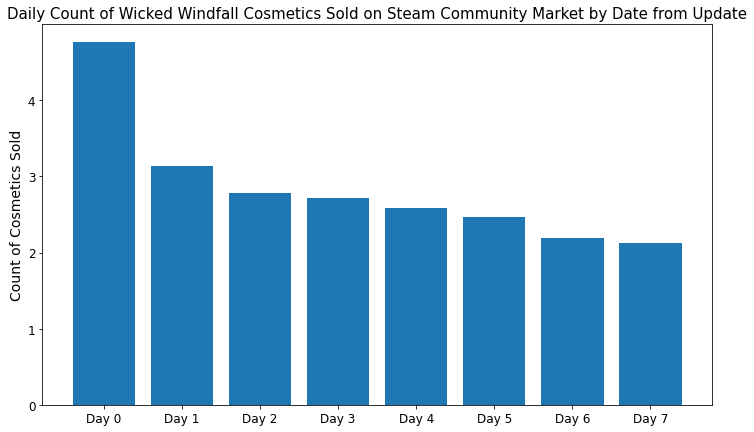

In [7]:
plt.figure(figsize=(12,7))
plt.bar(*zip(*dic.items()))
plt.title('Daily Count of Wicked Windfall Cosmetics Sold on Steam Community Market by Date from Update',fontsize=15)
plt.ylabel('Count of Cosmetics Sold',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig('daily_sold_volume.png')
plt.show()

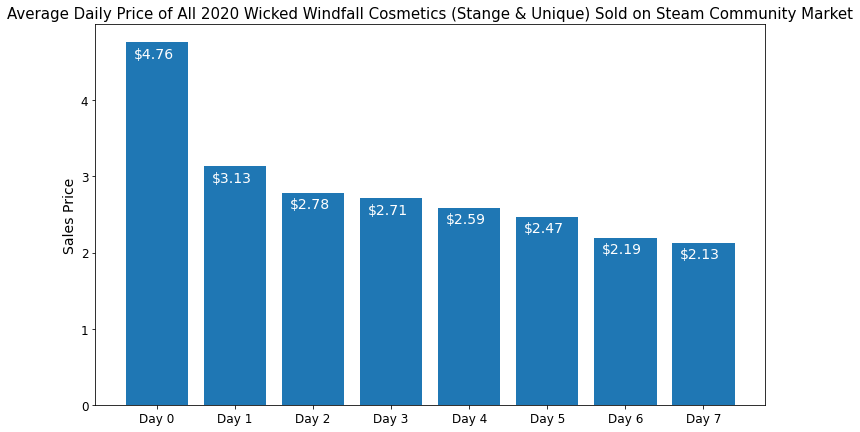

In [12]:
plt.figure(figsize=(12,7))
plt.bar(*zip(*dic.items()))
plt.title('Average Daily Price of All 2020 Wicked Windfall Cosmetics (Stange & Unique) Sold on Steam Community Market',fontsize=15)
plt.ylabel('Sales Price',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(list(dic.values())):
    plt.text(xlocs[i] - 0.3, v - 0.2, "$" + str(v),fontsize=14,c='w')
plt.savefig('daily_sales_price.png',dpi=200)
plt.show()

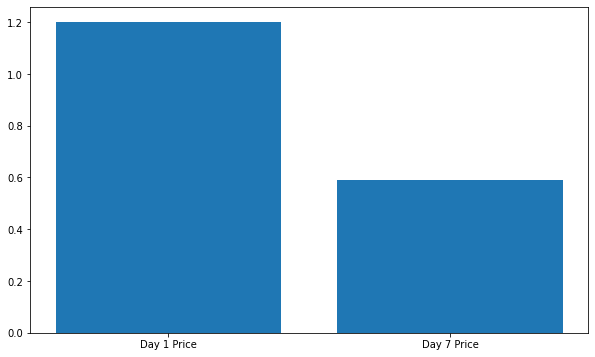

In [180]:
plt.figure(figsize=(10,6))
plt.bar(*zip(*dic.items()))
plt.show()

In [146]:
prices.groupby(['Quality']).agg({'Pct_change_from_day1_to_day7':np.mean}).sort_values(by='Pct_change_from_day1_to_day7')

,Pct_change_from_day1_to_day7
Quality,
Strange,-0.401987
Unique,-0.396506


In [147]:
prices.groupby(['Grade']).agg({'Pct_change_from_day1_to_day7':np.mean}).sort_values(by='Pct_change_from_day1_to_day7')

,Pct_change_from_day1_to_day7
Grade,
Commando,-0.458658
Mercenary,-0.404543
Assassin,-0.354231
Elite,-0.284559


In [158]:
a = round(prices.groupby(['Quality','Grade']).agg({'Pct_change_from_day1_to_day7':np.mean}),2)
b = round(prices.groupby(['Quality','Grade']).agg({'Day 7':np.mean}),2)
c = a.merge(b,left_index=True,right_index=True)
c

Pct_change_from_day1_to_day7  Day 7
Quality Grade                                         
Strange Assassin                          -0.26   4.16
        Commando                          -0.42   1.37
        Elite                             -0.24  19.30
        Mercenary                         -0.48   0.67
Unique  Assassin                          -0.45   1.34
        Commando                          -0.49   0.47
        Elite                             -0.33   6.32
        Mercenary                         -0.33   0.25

### Findings from the above: Rarity helps to hold value.
In general, the more rare cosmetic is, the less price drop from Day 1 to Day 7. This concept applies to both cosmetic's quality (Unique<Strange) and Grade (Mercenary<Commando<Assassin<Elite). Across the Grade, Strange cosmetics held more of their values from Day 1 to Day 7 compared to Unique cosmetics. For example, Elite&Strange Cosmetics' prices only dropped by 24%, while Elite&Unique Cosmetics' prices dropped by 33%, and Assassin&Strange cosmetics' prices only dropped 26% from Day 1 to Day 7, while Assassin&Unique cosmetrics prices dropped by 45%. This pattern also applies to Commando grade cosmetics, but it breaks for Mercenary cosmetics. Mercenary&Strange cosmetics' prices dropped by 48% from, but Mercenary&Unique cosmetics' prices only dropped by 33%.

Items, Pct drop in price from day 1 to day 7 increases as grade's rarity goes down (Elite>Assassin>Commando>Mercenary), which is as expected. Even for Unique items, a similar pattern is observed, with an exception of mercenary items. Unique Elite items dropped the least by 33%, followed by Assassin Grade Cosmetics ###

In [148]:
prices.groupby(['multiclass_indicator']).agg({'Pct_change_from_day1_to_day7':np.mean}).sort_values(by='Pct_change_from_day1_to_day7')

,Pct_change_from_day1_to_day7
multiclass_indicator,
0,-0.399669
1,-0.399005


In [149]:
prices.groupby(['misc_indicator']).agg({'Pct_change_from_day1_to_day7':np.mean}).sort_values(by='Pct_change_from_day1_to_day7')

,Pct_change_from_day1_to_day7
misc_indicator,
1,-0.414074
0,-0.386889


In [152]:
print("All Up Mean: ",np.mean(prices.Pct_change_from_day1_to_day7))
round(prices.groupby(['Cosmetic Name','Quality']).agg({'Pct_change_from_day1_to_day7':np.mean}),2)#.sort_values(by='Pct_change_from_day1_to_day7')

All Up Mean:  -0.3992462909616387


Pct_change_from_day1_to_day7
Cosmetic Name           Quality                              
A Handsome Handy Thing  Strange                         -0.39
                        Unique                          -0.12
All Hallows' Hatte      Strange                         -0.23
                        Unique                          -0.33
Balloonicorpse          Strange                         -0.25
                        Unique                          -0.33
Calamitous Cauldron     Strange                         -0.41
                        Unique                          -0.13
Eye-See-You             Strange                         -0.36
                        Unique                          -0.40
Flavorful Baggies       Strange                         -0.56
                        Unique                          -0.30
Glow from Below         Strange                         -0.42
                        Unique                          -0.33
Goblineer               Strange                         -0.62
                        Unique                          -0.65
Gourd Grin              Strange                         -0.29
                        Unique                          -0.47
Handsome Devil          Strange                         -0.35
                        Unique                          -0.44
Hollowed Helm           Strange                         -0.51
                        Unique                          -0.42
Impish Ears             Strange                         -0.57
                        Unique                          -0.57
King Cardbeard          Strange                         -0.43
                        Unique                          -0.19
Misfortune Fedora       Strange                         -0.37
                        Unique                          -0.46
Semi-tame Trapper's Hat Strange                         -0.49
                        Unique                          -0.66
Sir Pumpkinton          Strange                         -0.41
                        Unique                          -0.54
The Boom Boxers         Strange                         -0.42
                        Unique                          -0.39
The Fire Tooth          Strange                         -0.28
                        Unique                          -0.37
The Ghoul Box           Strange                         -0.53
                        Unique                          -0.13
The Seared Sorcerer     Strange                         -0.55
                        Unique                          -0.54
Wavefinder              Strange                         -0.02
                        Unique                          -0.47
Wrap-A-Khamon           Strange                         -0.38
                        Unique                          -0.48